In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
roc = cv2.imread(os.path.relpath('../../Data/roc3.jpeg'))
roc = cv2.cvtColor(roc,cv2.COLOR_BGR2GRAY)
roc = cv2.resize(roc,(1024,1024))

roc2 = cv2.imread(os.path.relpath('../../Data/ROC2.jpeg'))
roc2 = cv2.cvtColor(roc2,cv2.COLOR_BGR2GRAY)
roc2 = roc2[1:1700,:]
roc2 = cv2.resize(roc2,(1024,1024))



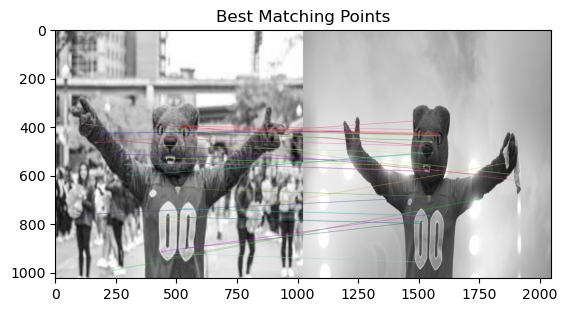

In [29]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
 
# find the keypoints and descriptors with SIFT
keypoints_roc, descriptor_roc = sift.detectAndCompute(roc,None)
keypoints_roc2, descriptor_roc2 = sift.detectAndCompute(roc2,None)
 
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptor_roc,descriptor_roc2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

result = cv2.drawMatchesKnn(roc,keypoints_roc,roc2,keypoints_roc2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the best matching points
plt.title('Best Matching Points')
plt.imshow(result)


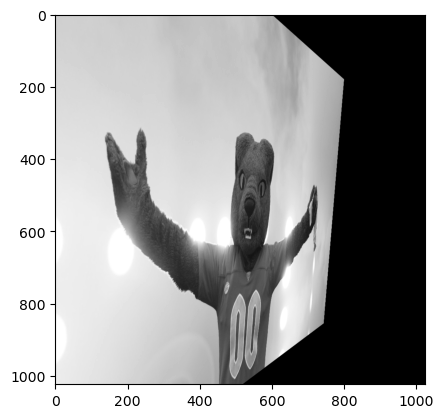

In [30]:
# Define empty matrices of shape no_of_matches * 2.
no_of_matches = len(good)
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))

for i in range(len(good)):
  p1[i, :] = keypoints_roc[good[i][0].queryIdx].pt
  p2[i, :] = keypoints_roc2[good[i][0].trainIdx].pt

# Find the homography matrix.
# This is the rotation operator to go from P1 to P2
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

# Use this matrix to transform the
# colored image wrt the reference image.
# Use this matrix to transform the
# colored image wrt the reference image.
transformed_img = cv2.warpPerspective(roc2,homography, (roc2.shape[0],roc2.shape[1]))

plt.imshow(transformed_img,cmap='gray')